https://towardsdatascience.com/data-science-in-finance-56a4d99279f7

## Moving Average Strategy Test

- The moving average strategy suggests **buying** a stock when **shorter SMA crosses over longer SMA** and **selling** it when **shorter SMA crosses down the longer one**. The picture below shows the **buy signal** (SMA_20, the **red line crosses over the blue line**, SMA_50) and the exit point as vice versa.

![Finance_Moving_Ave](image/1.JPG)

## 1- Data extraction and preparation

- Historical stock price data can be found from various sources but the simplest one is **Yahoo Finance**. To do this, we need to **import yfinance library** and other related libraries which will be used on data manipulation using pandas.

In this work, we will extract specific stock symbol data from Yahoo Finance and elaborate moving average strategy test. Let's first define the stategy. Moving average can be simple or exponential average of stock price in specific range of time such as 20, 50 or 200. Based on your favorite time interval, this can be minutes, days, weeks or even months. Relative position of moving averages can be sign of buying or selling signal.

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf

- First of all, we need to define the time range that we will examine the strategy. To use **yfinace library**, the **date should be in the format of YYYY-MM-DD**. Define the start date as your own favorite time. You can do the same for the end date but I prefer the **end date as today**. We can define it as below:

In [6]:
# define time range 
start = '2016-01-01'       # format: YYYY-MM-DD
end = dt.datetime.now()    # today

- In the next step, store your favorite stock symbol ticker string in a stock variable. We are going to use it in yahoo finance library to download as a data frame:

In [7]:
# favorite stock symbol 
stock='AMD'

In [8]:
df = yf.download(stock,start, end, interval='1d')
df.head() 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,2.97,3.01,2.87,2.87,2.87,11086100
2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500


## 2. Moving Average Calculation

- Let’s define the short and long simple moving average, SMA variable, and store them in the list named SMAs here.

In [9]:
# Let's calulate Simple Moving Average(SMA)
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

- We can calculate **moving average** one by one for **each SMA using rolling and mean function** but to make it more flexible for more than two SMAs, we may use **for loop** such as:

In [10]:
for i in SMAs:
    df["SMA_"+str(i)] = df.iloc[:,4].rolling(window=i).mean()

In [11]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50
Date,,,,,,,,
2020-10-13,84.860001,86.089996,83.970001,85.279999,85.279999,42764100,80.939501,82.2528
2020-10-14,85.860001,85.959999,83.459999,84.209999,84.209999,40446700,81.317001,82.2362
2020-10-15,83.400002,84.720001,82.419998,83.129997,83.129997,33610200,81.646000,82.1926


## 3. SMAs Relative Position Recognition

- if **shorter SMA is higher than longer SMA**, we are in the **up-trend** area and appropriate to have a position and sell it in the opposite condition.

In [12]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df.index:
    SMA_short=df['SMA_20']
    SMA_long =df['SMA_50']
    close=df['Adj Close'][i]
    
    if(SMA_short[i] > SMA_long[i]):                          #line 9
        print('Up trend')
        if(position==0):
            buyP=close   #buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i]):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)                      #line 23
    if(counter==df["Adj Close"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)
counter+=1
print(percentChange)            

Up trend
Buy at the price2.7200000286102295
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up

Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Down trend
Sell at the price39.0099983215332
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Up trend
Buy a

- This is a for loop block of code that will iterate over data set we previously read into df variable. After defining close price, short and long SMAs from the data frame, it will go into two different branches using if statement based on short and long SMA values (line 9). If **short SMA is above long SMA, it prints out the trend direction (‘Up trend’)** and if there is not existing position in the portfolio, it will buy a position (signal) based on the close price of that day. If short SMA reads smaller values than long SMA, it is in Down trend. If we have already a position, we should sell at the adjusted close price. Using append function in pandas (line 23), we will store the results to a percentChange variable list as defined in the previous line. The last part of block code, starting line24, is to examine whether there is an open position we are counting down to end of the data frame.

## 4. Statistics

- After defining some variables such as gains and losses with the quantity of them, we may use for loop again over individual values in perecntChange to find out statistical information. Positive values in the list refer to the gain and will be added up in gains variable. The negative values are losses and will be stored in losses variable. We can print out the total return as percent and round the value up to 2 decimal places.

In [13]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 2015-12-31 00:00:00 up to now with 11 trades:
SMAs used: [20, 50]
Total return over 11 trades: 1088.41%


- To calculate average gain and loss, we may simply use if statement to see if the number of gains is bigger than zero or not. If so, the average gain can be calculated by gains divided by a number of gains. If the number of losses is a positive value, it will calculate average losses as well. Maximum gain and loss can also be an attractive point of the trades strategy.

In [14]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'

if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)


Average Gain: 54.99325001538664
Average Loss: -8.162503859101655
Max Return: 132.3529450435539
Max Loss: -16.20305914577973
Gain/loss ratio: 6.737301563914858


- For this example, the average gain for a single stock share is 62 dollars, the average loss is almost 8 dollars. The maximum return is 153 and the maximum loss is 16 dollars.


- Batting average is calculated by dividing the number of gains over the total number of trades. This can be a sign of accuracy to enter for a position ranges between 0 and 1. 1 is the most accurate bat.

In [15]:
if(numGains>0 or numLosses>0):
    batAvg=numGains/(numGains+numLosses)
else:
    batAvg=0
print("Batting Avg: "+ str(batAvg))

Batting Avg: 0.6363636363636364


## 5. Plotting

- Although you can use seaborn or matplotlib libraries to plot the stock price, the mplfinance library is perfectly designed specifically for the stock price plot. Its function accept various attributes such as figure size, price plotting type (line, candlestick, …) and moving average.

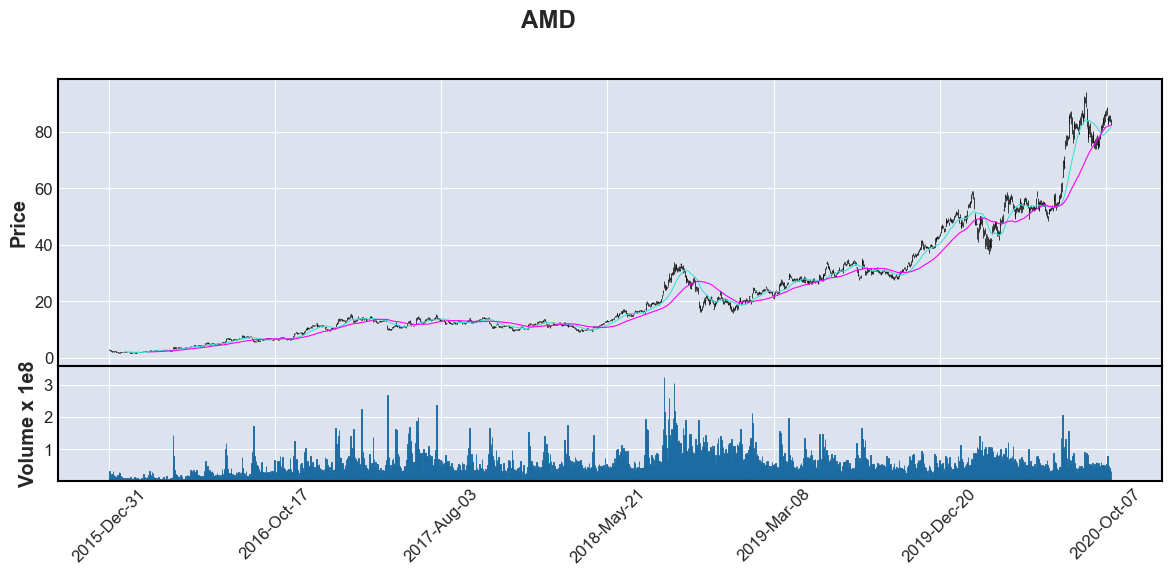

In [16]:
mpf.plot(df, type = 'ohlc',figratio=(16,6), mav=(short_sma,long_sma), 
         volume=True, title= str(stock), style='default')